In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load the data from the CSV file into a pandas DataFrame
df = pd.read_csv("/content/Data_segregatedv5.1.1_HD.csv")

# Split the data into features (X) and labels (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and testing sets
ran = 28
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=ran)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Train the k-NN classifier with the training data
n_neighbors=5
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)

# Plot the decision boundary using matplotlib
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy, "Random: ", ran)

Accuracy: 0.875 Random:  28


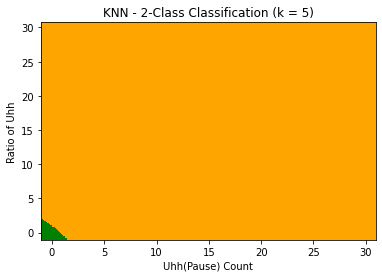

In [24]:

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
cmap_light = ListedColormap(["orange", "green"])
plt.title("KNN - 2-Class Classification (k = %i)" % (n_neighbors))
plt.ylabel('Ratio of Uhh')
plt.xlabel('Uhh(Pause) Count')
#plt.legend()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)



Accuracy :  0.8125  K =  1
Accuracy :  0.9375  K =  2
Accuracy :  0.9375  K =  4
Accuracy :  0.9375  K =  6
Accuracy :  0.9375  K =  7
Accuracy :  0.9375  K =  8
Accuracy :  0.9375  K =  9
Accuracy :  0.9375  K =  10
Accuracy :  0.9375  K =  11
Accuracy :  0.9375  K =  12
Accuracy :  0.9375  K =  13
Accuracy :  0.9375  K =  14
Accuracy :  0.9375  K =  15
Accuracy :  0.9375  K =  16
Accuracy :  0.9375  K =  17
Accuracy :  0.9375  K =  18
Accuracy :  0.9375  K =  19
Accuracy :  0.9375  K =  20
Accuracy :  0.9375  K =  21
Accuracy :  0.9375  K =  22
Accuracy :  0.9375  K =  23
Accuracy :  0.9375  K =  24
Accuracy :  0.9375  K =  25


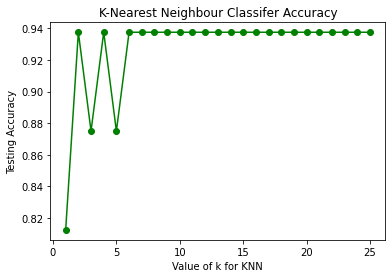

In [5]:
# Train a KNeighborsClassifier with different values of k
k_range = range(1, 26)
scores = []
maxacc = 0
maxk = 0
for k in k_range:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    scores.append(accuracy)
    if (maxacc <= accuracy):
      maxacc = accuracy
      maxk = k
      print("Accuracy : ", maxacc, " K = ", maxk)
# Plot the relationship between k and testing accuracy
plt.plot(k_range, scores, 'go-')
plt.title("K-Nearest Neighbour Classifer Accuracy")
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

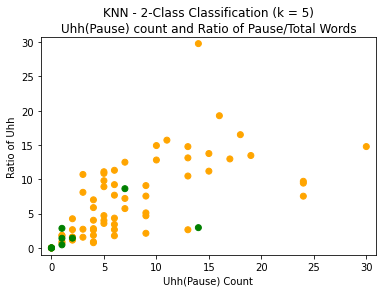

In [ ]:
# Plot also the training points
cmap_bold = ListedColormap(["orange", "green"])
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.title("KNN - 2-Class Classification (k = %i)" % (n_neighbors))

fig, ax = plt.subplots()
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN - 2-Class Classification (k = %i)" % (n_neighbors) + "\n" "Uhh(Pause) count and Ratio of Pause/Total Words")
# produce a legend with the unique colors from the scatter
#ax.legend()   (Labels={"Verb Count", "Ratio of Verb"})
#legend1 = ax.legend(*scatter.legend_elements(),labels=['NonBROCA','BROCA'],
#                    loc="upper right", title="")
#                    loc="lower left", title="Classes")
#ax.add_artist(legend1)
plt.xlabel('Uhh(Pause) Count')
plt.ylabel('Ratio of Uhh')

# produce a legend with a cross section of sizes from the scatter
#handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
#legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()
#plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
#plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)
#plt.show()